In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# File path
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Sales Executive Analysis Kum.xlsx'

# Define columns based on row index 2 of the CSV
cols = ['Executive', 'Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']

# Load data, skipping the top metadata rows
df_sales = pd.read_excel(file_path, skiprows=3, names=cols)

print("Libraries loaded and Kumarakom Sales Executive data imported.")

Libraries loaded and Kumarakom Sales Executive data imported.


In [2]:
# 1. Basic Cleaning: Remove rows with missing names or total/metadata rows
df_sales = df_sales.dropna(subset=['Executive'])
# Fix: Force column to string type before searching to prevent AttributeError
df_sales = df_sales[~df_sales['Executive'].astype(str).str.contains('Total|Grand Total|Contribution Analysis', case=False, na=False)]

# 2. Clean numeric columns (handling potential commas or strings)
numeric_cols = ['Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']

for col in numeric_cols:
    # Fix: Always convert to string first so .str accessor works on every row
    df_sales[col] = df_sales[col].astype(str).str.replace(',', '').str.strip()
    # Convert to numeric, errors become NaN, then fill with 0
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce').fillna(0)

# 3. Filter for active executives (Revenue > 0)
df_active = df_sales[df_sales['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active Sales Executives for analysis.")
df_active.head()

Cleaned 6 active Sales Executives for analysis.


,Executive,Nights,Occ_Pct,Pax,Room_Revenue,Revenue_Pct,ADR,ARP
0,Boney Kurian,587,50.09,1237,3818061.60,44.86,6504.3639,3086.5494
1,Jayant Joglekar,42,3.58,89,221037.50,2.60,5262.7976,2483.5674
4,Nikhil Dhatrak,28,2.39,69,188495.72,2.21,6731.9900,2731.8220
5,Online,366,31.23,871,3130165.91,36.78,8552.3659,3593.7611
6,Rupesh Joy,38,3.24,84,185982.35,2.19,4894.2724,2214.0756


C:\Users\SC\AppData\Local\Temp\ipykernel_16412\2420151458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')


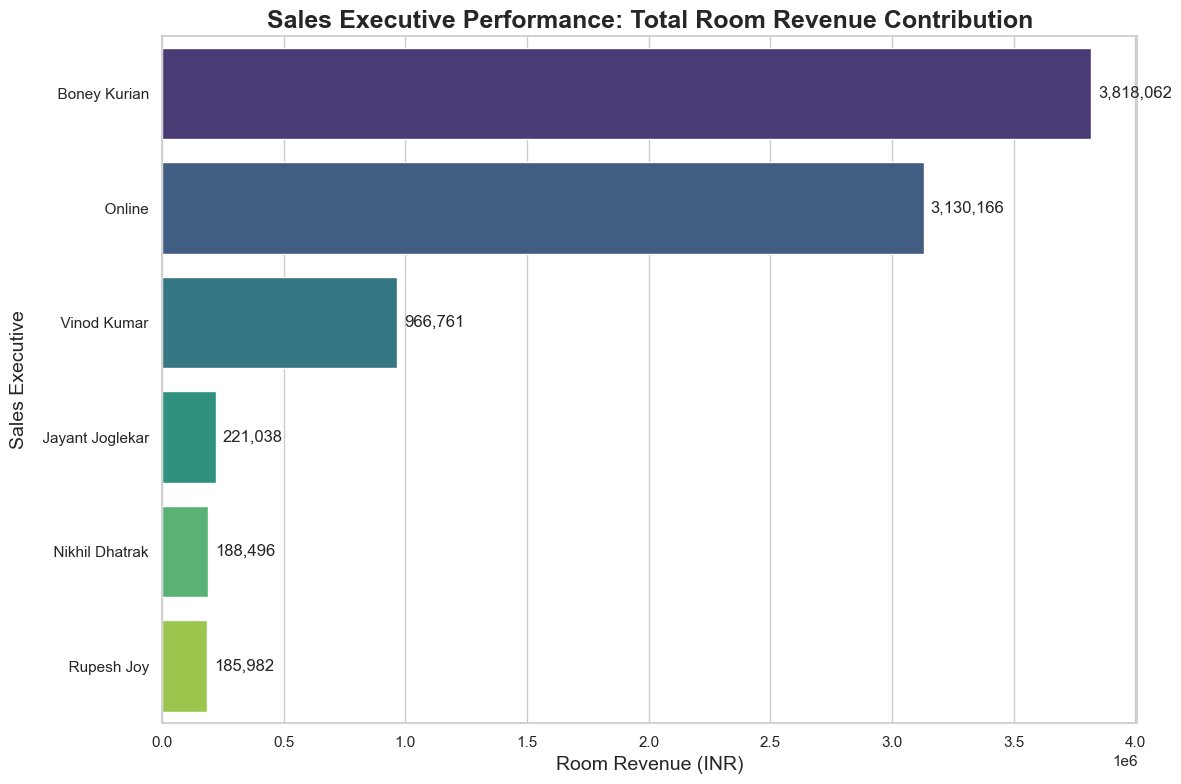

In [3]:
# Sorting by revenue to show top contributors
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')

plt.title('Sales Executive Performance: Total Room Revenue Contribution', fontsize=18, fontweight='bold')
plt.xlabel('Room Revenue (INR)', fontsize=14)
plt.ylabel('Sales Executive', fontsize=14)

# Adding exact value labels for clarity
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=5)

plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. TOP PRODUCER: Boney Kurian is the clear leader in total revenue.
#### 2. DIGITAL CHANNEL: "Online" represents a massive portion of the business, often outperforming several individual executives combined.

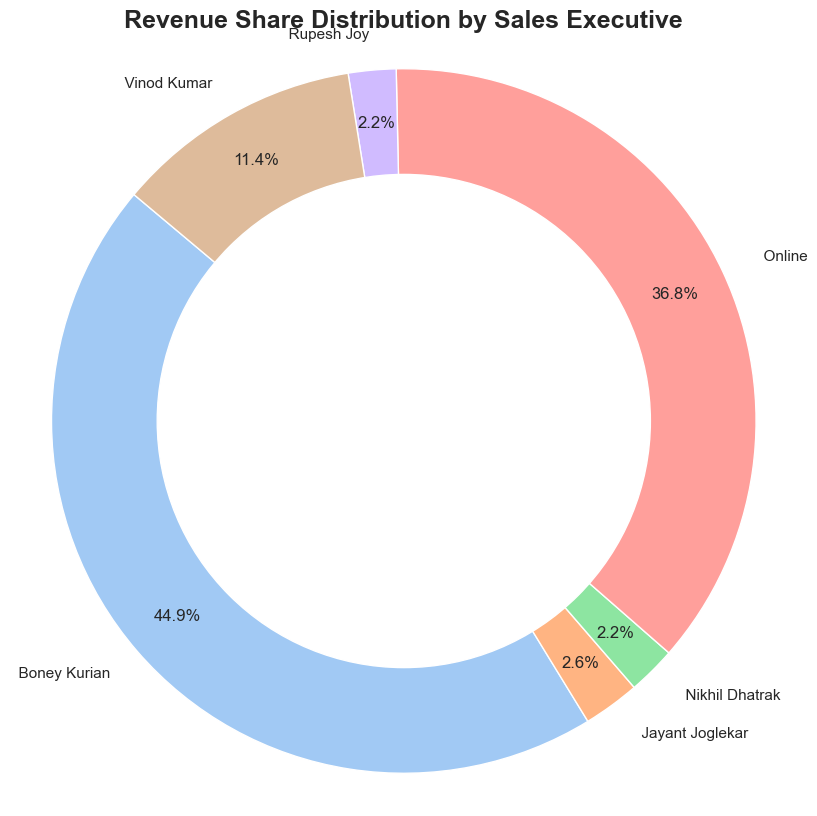

In [4]:
# Showing the revenue mix
plt.figure(figsize=(10, 10))
data = df_active['Room_Revenue']
labels = df_active['Executive']
colors = sns.color_palette("pastel")

plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

# Convert to Donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Revenue Share Distribution by Sales Executive', fontsize=18, fontweight='bold')
plt.axis('equal') 
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. CONCENTRATION: If Boney Kurian and Online account for over 80% of revenue, the property is highly dependent on these two channels.

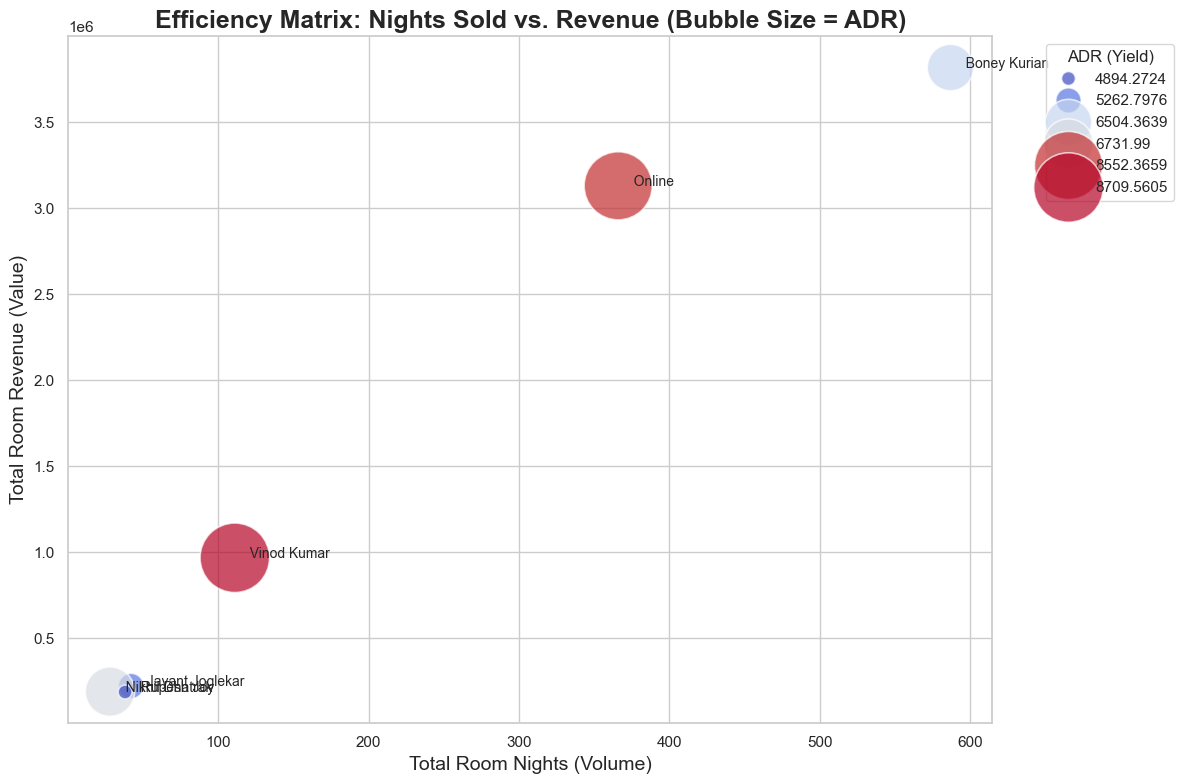

In [5]:
# Analyzing Volume (Nights) vs Value (Revenue) vs Yield (ADR)
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ADR', 
                hue='ADR', sizes=(100, 2500), palette='coolwarm', alpha=0.7)

plt.title('Efficiency Matrix: Nights Sold vs. Revenue (Bubble Size = ADR)', fontsize=18, fontweight='bold')
plt.xlabel('Total Room Nights (Volume)', fontsize=14)
plt.ylabel('Total Room Revenue (Value)', fontsize=14)
plt.legend(title='ADR (Yield)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to bubbles
for i, row in df_active.iterrows():
    plt.text(row['Nights']+5, row['Room_Revenue'], row['Executive'], fontsize=10)

plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. HIGH YIELD: The "Online" bubble is higher on the Y-axis relative to its X-axis position compared to others, suggesting high yield.
#### 2. BULK VOLUME: Boney Kurian is the "Volume Anchor" for the resort.

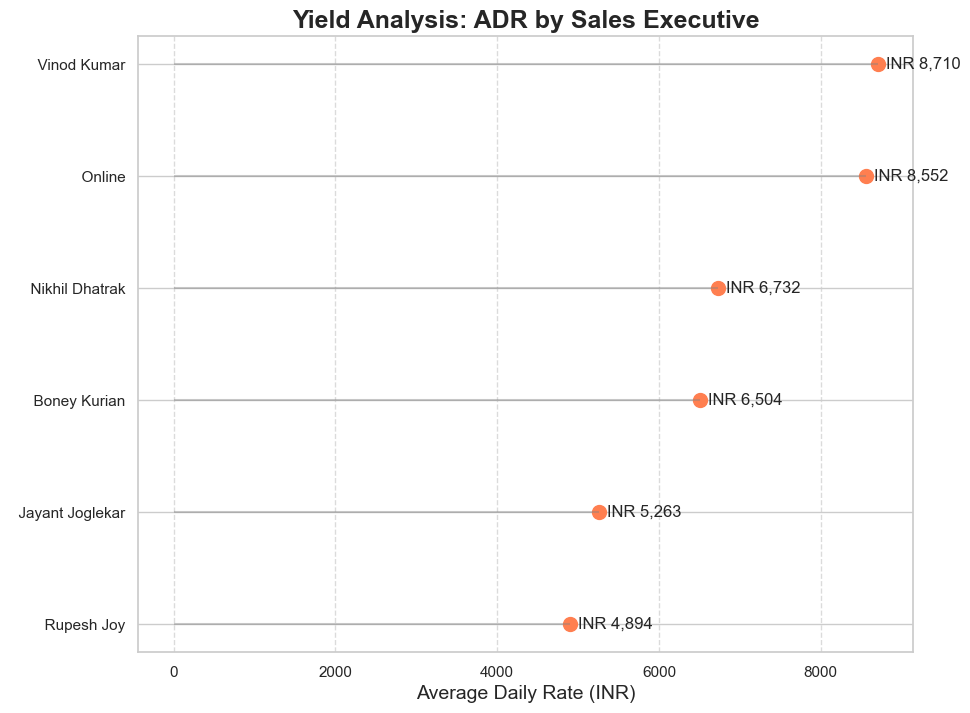

In [6]:
# Comparing the quality of bookings (ADR)
df_yield = df_active.sort_values(by='ADR', ascending=True)

plt.figure(figsize=(10, 8))
plt.hlines(y=df_yield['Executive'], xmin=0, xmax=df_yield['ADR'], color='grey', alpha=0.4)
plt.scatter(df_yield['ADR'], df_yield['Executive'], color='coral', s=100, alpha=1)

# Add exact value labels
for i, val in enumerate(df_yield['ADR']):
    plt.text(val + 100, i, f'INR {val:,.0f}', va='center')

plt.title('Yield Analysis: ADR by Sales Executive', fontsize=18, fontweight='bold')
plt.xlabel('Average Daily Rate (INR)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. PRICE LEADERSHIP: Online bookings command the highest ADR (~8,552 INR), indicating strong demand for direct/OTA pricing.
#### 2. SALES BENCHMARK: Boney Kurian maintains a healthy ADR of ~6,504 INR despite very high volume.

In [7]:
# Final table sorted by Revenue
summary = df_active[['Executive', 'Nights', 'Room_Revenue', 'ADR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Kumarakom_Sales_Executive_Performance.csv', index=False)

print("Full analysis complete. Performance Summary Table:")
summary

Full analysis complete. Performance Summary Table:


,Executive,Nights,Room_Revenue,ADR,Revenue_Pct
0,Boney Kurian,587,3818061.60,6504.3639,44.86
5,Online,366,3130165.91,8552.3659,36.78
7,Vinod Kumar,111,966761.22,8709.5605,11.36
1,Jayant Joglekar,42,221037.50,5262.7976,2.60
4,Nikhil Dhatrak,28,188495.72,6731.9900,2.21
6,Rupesh Joy,38,185982.35,4894.2724,2.19


### Key Insights for Rhythm Kumarakom (Sales Executive):
#### 1. The Heavy Hitter: Boney Kurian is the primary driver of the resort's performance, contributing 44.86% of the total revenue with over 587 nights.

#### 2. The Yield Driver: The Online channel is significantly more profitable on a per-night basis, securing an ADR of 8,552 INR, which is roughly 30% higher than the average executive rate.

#### 3. Volume vs. Value: While executives like Vinod Kumar bring in significant volume (111 nights), their ADR is lower (~8,709 INR). This balance is necessary to maintain occupancy, but shifting some of this volume to higher-rate segments could boost total revenue.

#### 4. Growth Opportunity: Smaller contributors like Nikhil Dhatrak and Rupesh Joy show that they can secure bookings; the goal should be to scale their volume to match the top performers.